372 484


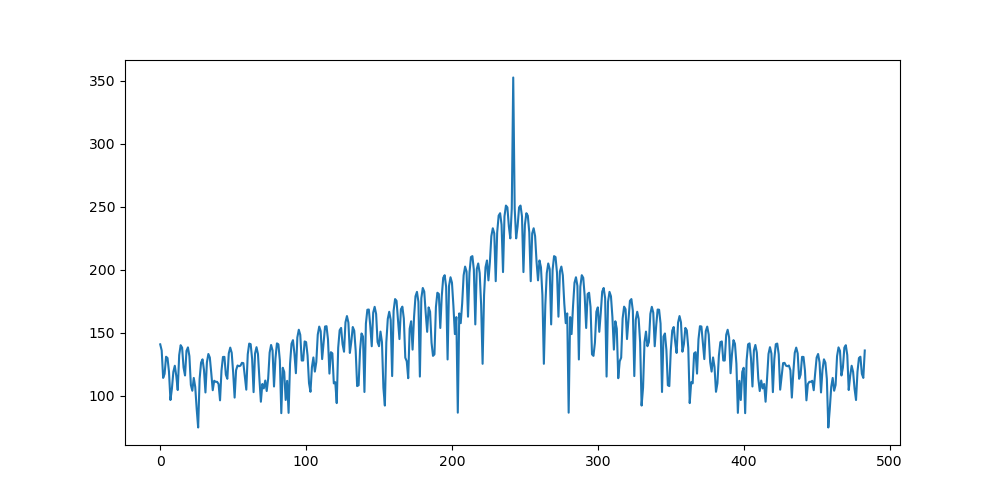

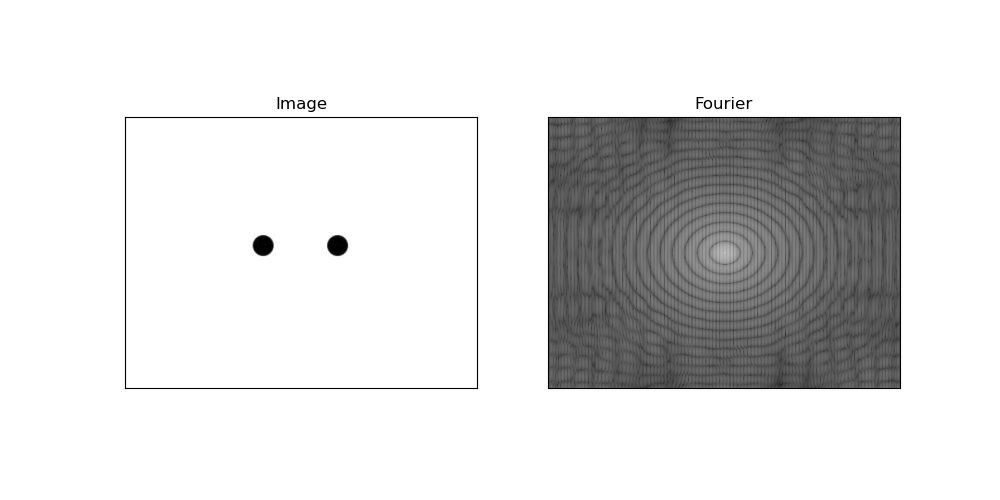

In [51]:
from matplotlib import pyplot as plt
import numpy as np
#import ipywidgets as widgets
#%matplotlib widget

img = plt.imread('filtrage/trousyoung.JPG') 
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fourier = 20*np.log(np.abs(fshift))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(fourier, cmap = 'gray')
plt.title('Fourier'), plt.xticks([]), plt.yticks([])

lignes, colonnes = fourier.shape
print(lignes, colonnes)
plt.figure(figsize=(10,5))
plt.plot(abs(fourier[int(lignes/2),:]))

plt.show()

481 650


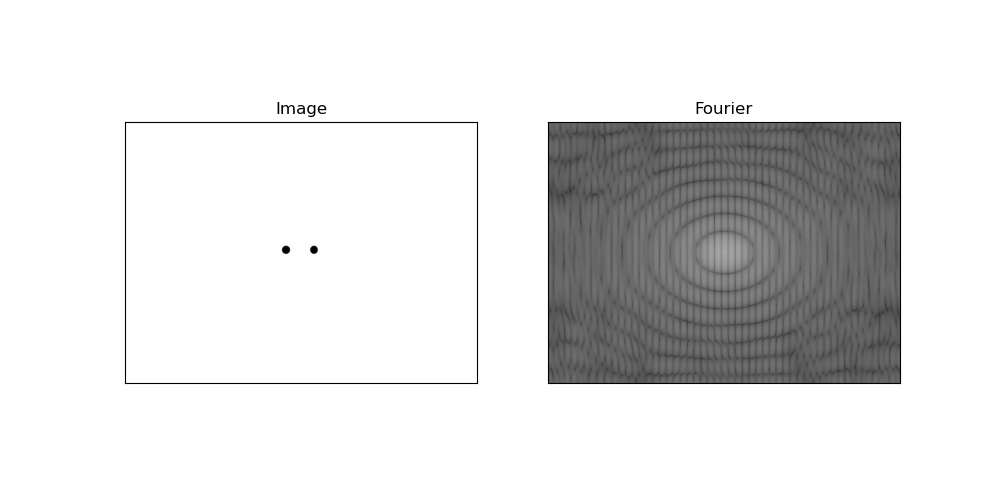

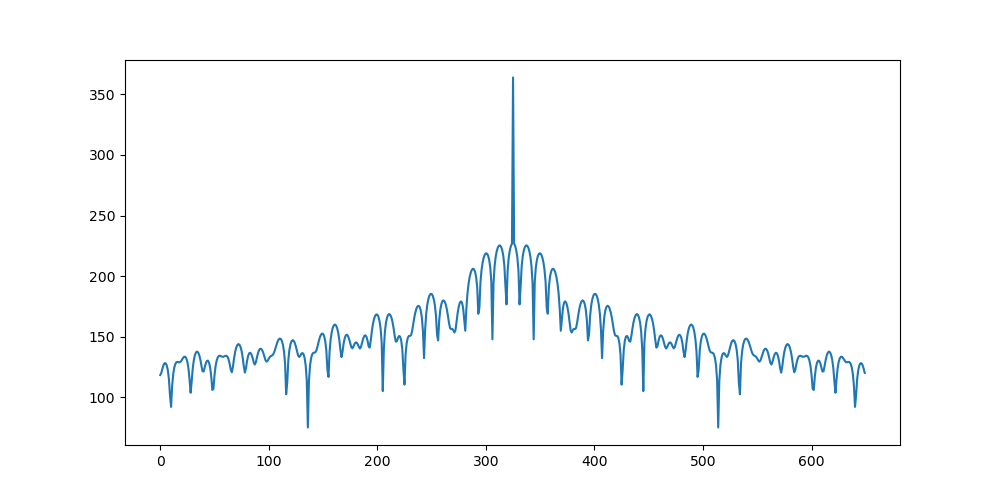

In [50]:
from matplotlib import pyplot as plt
import numpy as np
#import ipywidgets as widgets
#%matplotlib widget

img = plt.imread('filtrage/trousyoung2.JPG') 
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fourier = 20*np.log(np.abs(fshift))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(fourier, cmap = 'gray')
plt.title('Fourier'), plt.xticks([]), plt.yticks([])

lignes, colonnes = fourier.shape
print(lignes, colonnes)
plt.figure(figsize=(10,5))
plt.plot(abs(fourier[int(lignes/2),:]))



In [ ]:
On fabrique les trous directement 

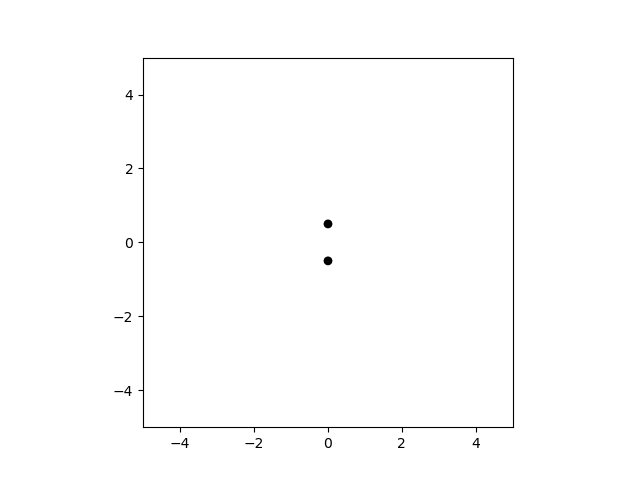

720.0
960.0


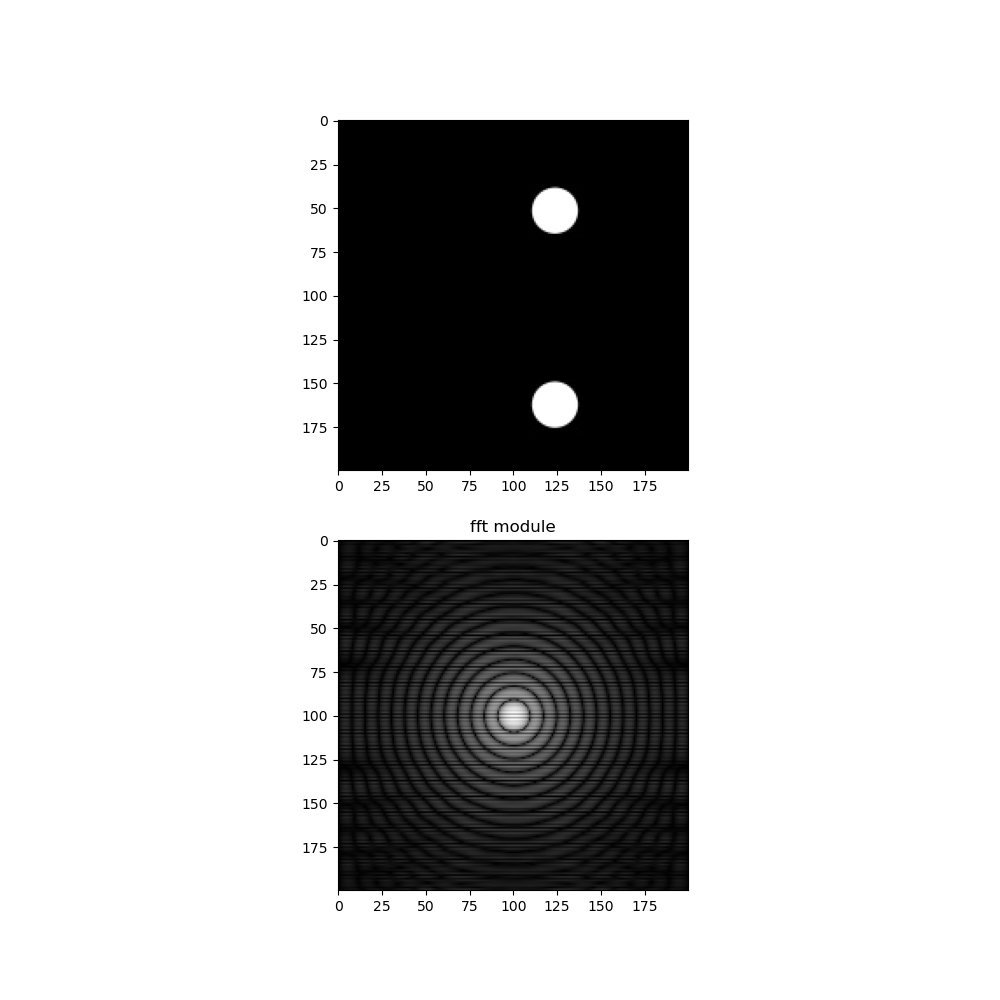

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy
import ipywidgets as widgets
%matplotlib widget

# fonction de normalisation
def norma(mat):
     mat1 = mat.real
     mat1 -= mat1.min()
     mat1 *= 255. / mat1.max()
     return mat1

#fonction de normailsation sur une échelle logarithmique
def normalog(mat):
     mat1 = norma(mat)
     mat1 = np.log(1 + mat1)
     mat1 *= 255. / mat1.max()
     return mat1

circle1 = plt.Circle((0, -0.5), 0.1, color='black')
circle2 = plt.Circle((0, 0.5), 0.1, color='black')
fig, ax = plt.subplots()
plt.xlim(-5,5)
plt.ylim(-5,5)
ax.set_aspect(1)
#ax.set_axis_off()
ax.add_artist(circle1)
ax.add_artist(circle2)
plt.savefig("2_cercles.jpg",dpi=300)
plt.show()

image_filename = "2_cercles.jpg"
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

y=np.shape(image)
negatif=np.zeros(y)
negatif=255-image

centreX=y[0]/2
print(centreX)
centreY=y[1]/2
print(centreY)
negatif=negatif[int(centreX)-100:int(centreX)+100,int(centreY)-100:int(centreY)+100]
negatif_fft = np.fft.fft2(negatif)

fft_abs = abs(negatif_fft)
fft_abs = np.fft.fftshift(fft_abs)

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(negatif, cmap = mpl.cm.gray)
ax1.set_aspect(1)

ax2 = fig.add_subplot(2, 1, 2)
plt.title('fft module')
ax2.imshow(normalog(fft_abs), cmap = mpl.cm.gray)
ax2.set_aspect(1)

plt.show()

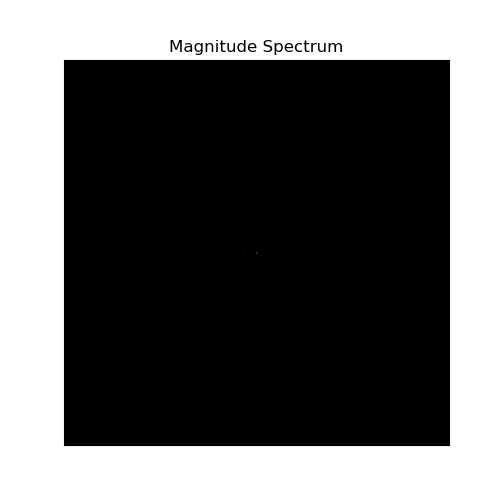

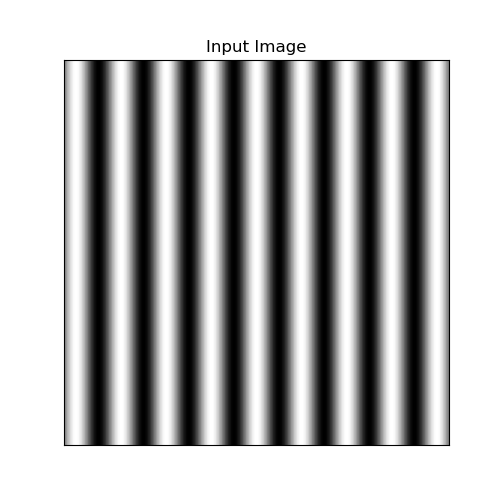

In [29]:
# pour utiliser open cv
# pip3 install opencv-python

from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as widgets
%matplotlib widget


taille=512
x = np.arange(taille)  # generate values from 0 to 255 (our image size)
y = np.sin(2 * np.pi * x / 30)  #calculate sine of x values
y += max(y) # offset sine wave by the max value to go out of negative range of sine 
img = np.array([[y[j]*(taille-1) for j in range(taille)] for i in range(taille)], dtype=np.uint8) # create 2-D array of sine-wave

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 200*np.abs(fshift)

plt.figure(figsize=(5,5))
plt.imshow(img2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(5,5))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()




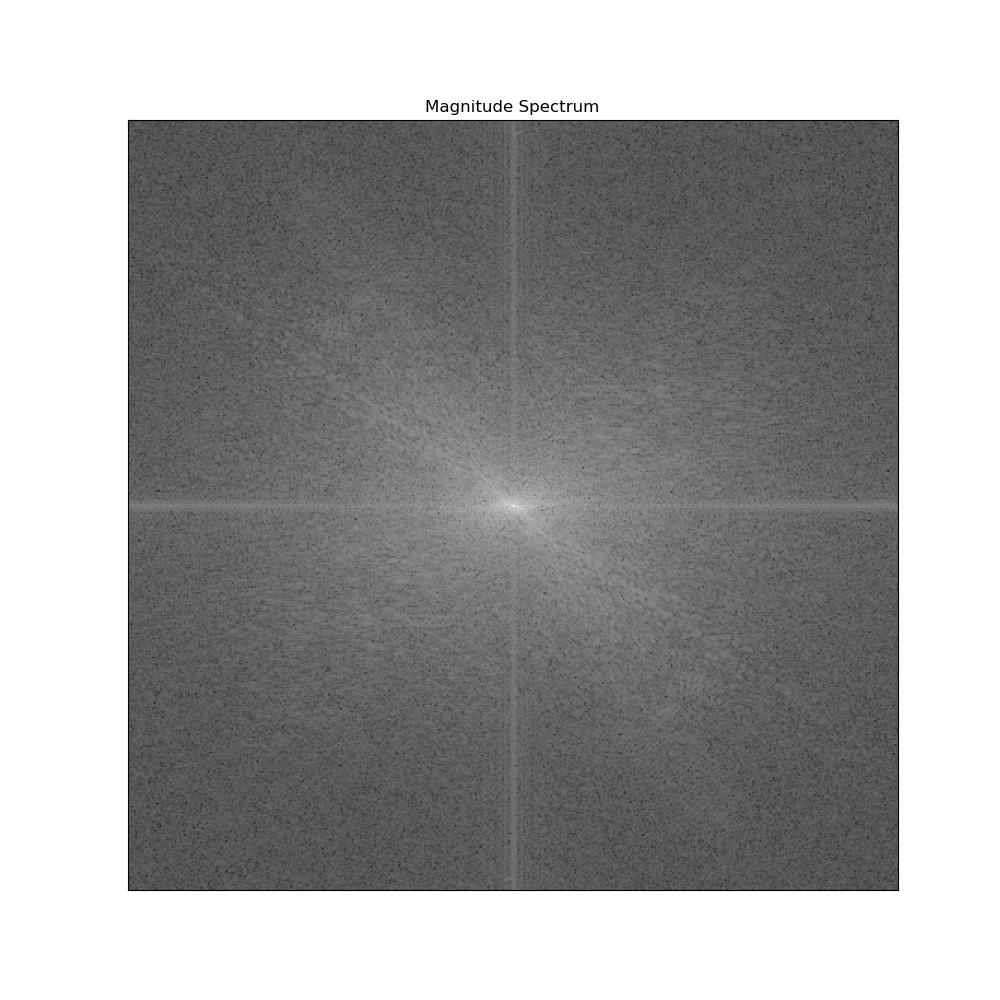

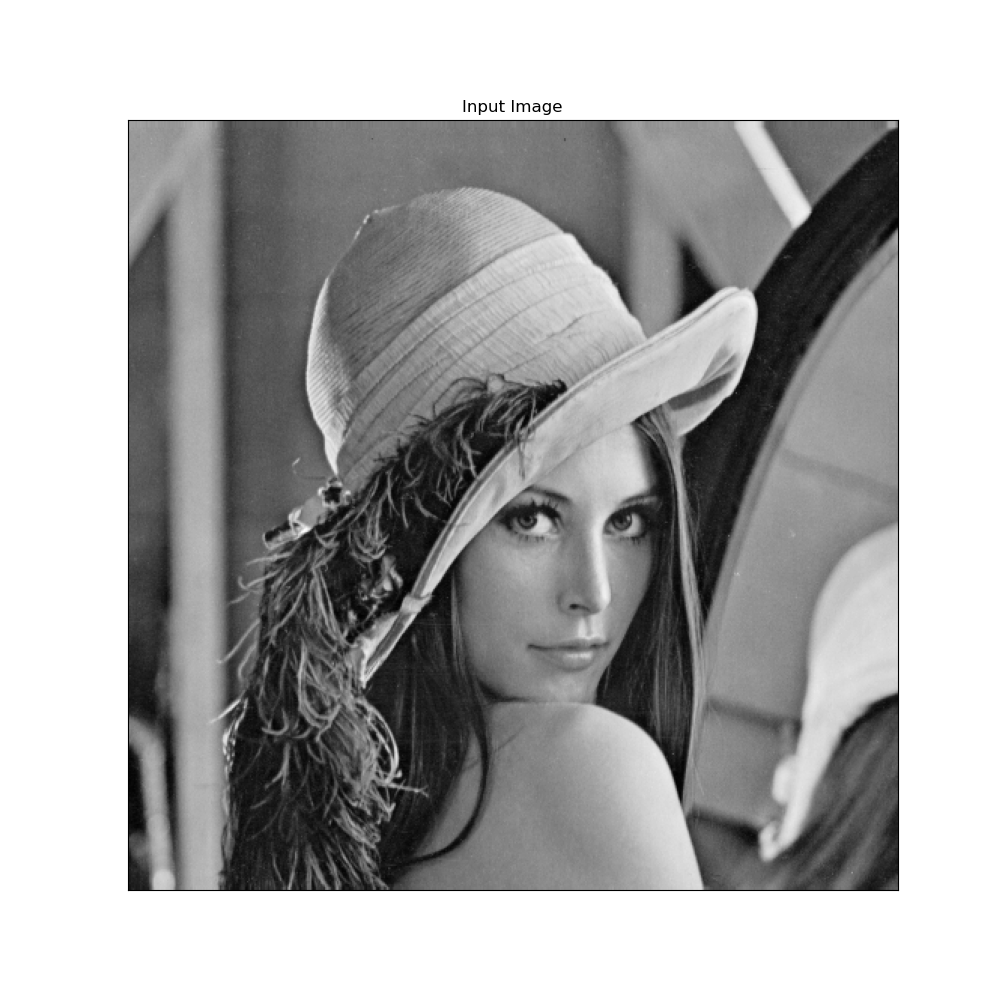

In [31]:
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as widgets
%matplotlib widget

img = plt.imread('lena_gray.gif') # load an image
img = img[:, :, :3].mean(axis=2)  # Convert to grayscale

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(10,10))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-58-95f1213e2d6b>:60: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20*np.log(np.abs(fshift))


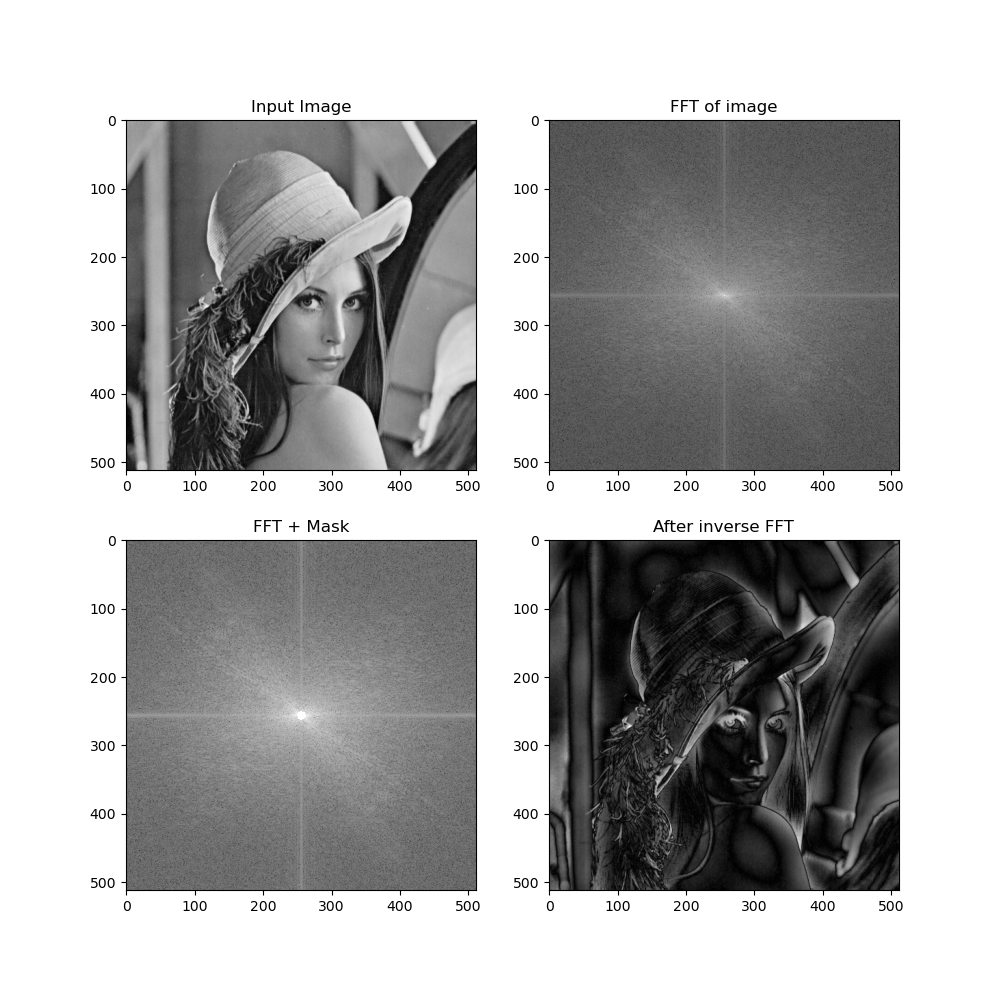

In [58]:
from matplotlib import pyplot as plt
import numpy as np

img = plt.imread('lena_gray.gif') # load an image
img = img[:, :, :3].mean(axis=2)  # Convert to grayscale

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(np.abs(dft_shift))

# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

#mask = np.ones((rows, cols, 2), np.uint8)
mask = np.ones((rows, cols), np.uint8)
r = 5
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
"""
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
"""


# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20*np.log(np.abs(fshift))

#Inverse shift to shift origin back to top left.
dft = np.fft.fft2(img)
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = np.fft.ifft2(f_ishift)

#Magnitude spectrum of the image domain
img_back = 20*np.abs(img_back)



fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()